# WeRateDogs Twitter Data: Analyses Report

In [1]:
import matplotlib
import pandas as pd
import numpy as np
import requests
import tweepy
import os
import json
import time
import re
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

%matplotlib inline

In [7]:
df_twitter_enhanced_clean = pd.read_csv('./resources/twitter_archive_master.csv')


In [8]:
df_twitter_enhanced_clean
df_twitter_enhanced_clean['tweet_id'] = df_twitter_enhanced_clean['tweet_id'].astype(object)
df_twitter_enhanced_clean['timestamp'] = pd.to_datetime(df_twitter_enhanced_clean.timestamp)
df_twitter_enhanced_clean['source'] = df_twitter_enhanced_clean['source'].astype('category')
df_twitter_enhanced_clean['life_stage'] = df_twitter_enhanced_clean['life_stage'].astype('category')
df_twitter_enhanced_clean['dog_gender'] = df_twitter_enhanced_clean['dog_gender'].astype('category')

df_twitter_enhanced_clean.set_index('timestamp', inplace=True)

### Visualization 1 : Correlation Heat Map

Text(0.5,1,'Correlation Heat Map')

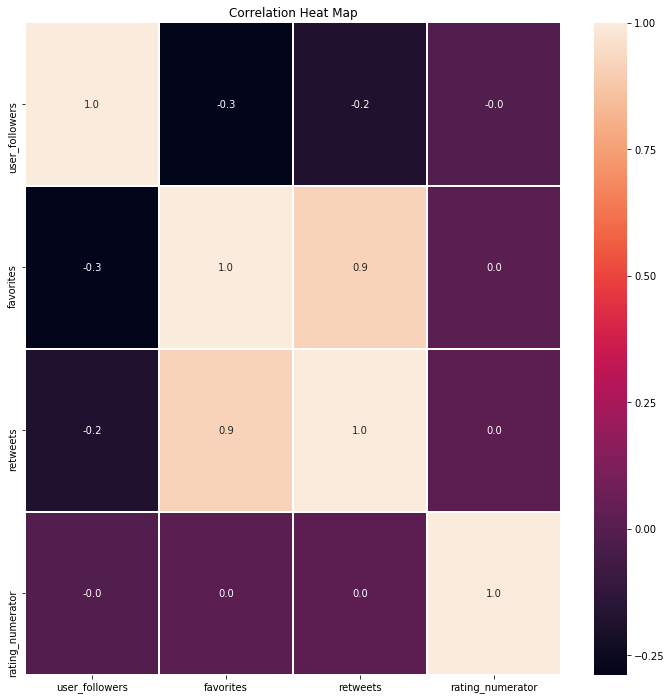

In [9]:
#put up a correlation map
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df_twitter_enhanced_clean[['source','user_followers','favorites','retweets',
               'rating_numerator']].corr(), annot=True, linewidths=.8, fmt= '.1f',ax=ax)
plt.title('Correlation Heat Map')

### Visualization 2: Data partition on basis of Life stage of dogs

(-1.288268191449591,
 1.2310305760057396,
 -1.2401381220397572,
 1.2110819987279693)

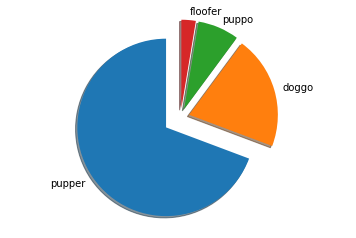

In [10]:
life_stage_count = list(df_twitter_enhanced_clean[df_twitter_enhanced_clean['life_stage'] != 'None']['life_stage'].value_counts())[0:4]
life_stages = df_twitter_enhanced_clean[df_twitter_enhanced_clean['life_stage'] != 'None']['life_stage'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) 

figure1, axis1 = plt.subplots()
axis1.pie(life_stage_count, explode = explode, labels = life_stages, shadow = True, startangle = 90)
axis1.axis('equal')

### Visualization 3: Scatter plot between favorites and retweets. 

Text(0.5,1,'Retweets and favorites Scatter plot')

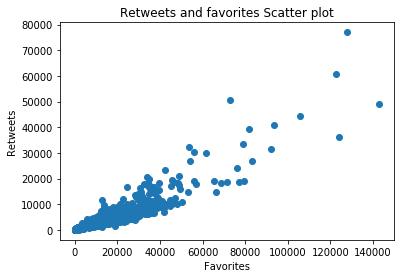

In [11]:
plt.scatter(df_twitter_enhanced_clean['favorites'], df_twitter_enhanced_clean['retweets'])
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot')

### Analyses
- Strong correlation between favorites and retweets, this is expected.
- Negative correlation between user followers and retweets, this is not expected.
- Dogs in __Pupper__ stage of dog life cycle get most tweets, which is expected.
- As expected there is a big positive (+0.9; shown by correlation heat map) correlation between the retweets and favorites.

## Conclusion

I can say that the twitter handle of WeRateDogs gives a lot of interesting insights about how the sentiments of the people work when it comes to different breeds of dogs within their different life stages. It also tells us that having more followers on twitter is not directly proportional to more retweets of a users tweet. 